<a href="https://colab.research.google.com/github/Hyunta/Bigdata/blob/main/%EB%B9%99%ED%95%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import datetime as dt # date and time processing functions
import itertools
import matplotlib.pyplot as plt # basic plotting 
import matplotlib.dates as mdates # date processing in matplotlib
from matplotlib.offsetbox import AnchoredText
plt.style.use('ggplot') # use ggplot style
%matplotlib inline 

In [4]:
# read in the data from the provided csv file
df = pd.read_csv('seaice.csv')

In [5]:
df

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
...,...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26350,2019,5,28,10.078,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26351,2019,5,29,10.219,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26352,2019,5,30,10.363,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south


In [7]:
df.drop(' Source Data', axis=1)

,Year,Month,Day,Extent,Missing,hemisphere
0,1978,10,26,10.231,0.0,north
1,1978,10,28,10.420,0.0,north
2,1978,10,30,10.557,0.0,north
3,1978,11,1,10.670,0.0,north
4,1978,11,3,10.777,0.0,north
...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,south
26350,2019,5,28,10.078,0.0,south
26351,2019,5,29,10.219,0.0,south
26352,2019,5,30,10.363,0.0,south


In [15]:
df.columns

Index(['Year', 'Month', 'Day', '     Extent', '    Missing', ' Source Data',
       'hemisphere', 'Date'],
      dtype='object')

In [17]:
df.columns
df = df.rename(columns={' Day':'Day', ' Month':'Month','     Extent':'Extent','    Missing':'Missing'})

In [19]:
df.columns

Index(['Year', 'Month', 'Day', 'Extent', 'Missing', ' Source Data',
       'hemisphere', 'Date'],
      dtype='object')

In [12]:
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])
df.index = df['Date'].values

In [20]:
north = df[df['hemisphere'] == 'north']
south = df[df['hemisphere'] == 'south']

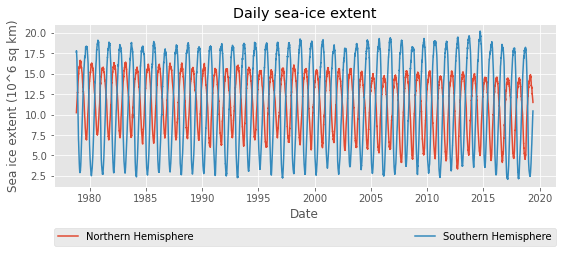

In [21]:
plt.figure(figsize=(9,3))
plt.plot(north.index,north['Extent'], label='Northern Hemisphere')
plt.plot(south.index,south['Extent'], label='Southern Hemisphere')

# add plot legend and titles
plt.legend(bbox_to_anchor=(0., -.362, 1., .102), loc=3, ncol=2, 
           mode="expand", borderaxespad=0.)
plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Date')
plt.title('Daily sea-ice extent');

(1977.0, 2019.0)

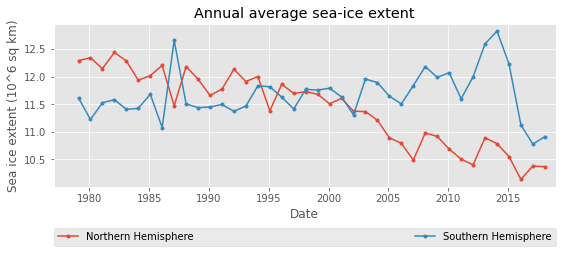

In [22]:
# resample raw data into annual averages
northyear = north['01-01-1979':'31-05-2019'].resample('12M').mean()
southyear = south['01-01-1979':'31-05-2019'].resample('12M').mean()

# remove the initial and final item as they aer averaged incorrectly (also indexes seem bad)
northyear = northyear[1:-1]
southyear = southyear[1:-1]

plt.figure(figsize=(9,3))
plt.plot(northyear.Year,northyear['Extent'], marker = '.', label='Northern Hemisphere')
plt.plot(southyear.Year,southyear['Extent'], marker = '.', label='Southern Hemisphere')

# add plot legend and titles
plt.legend(bbox_to_anchor=(0., -.362, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Date')
plt.title('Annual average sea-ice extent')
plt.xlim(1977, 2019)

In [25]:
# define date range to plot between
start = 1978
end = dt.datetime.now().year + 1

# define plot
f, axarr = plt.subplots(2, sharex=True, figsize=(9,6))


# organise plot axes (set x axis to months only and cycle colours according to gradient)
month_fmt = mdates.DateFormatter('%b')
axarr[0].xaxis.set_major_formatter(month_fmt)
axarr[0].set_prop_cycle(plt.cycler('color', 
                                   plt.cm.winter(np.linspace(0, 1, len(range(start, end))))))
axarr[1].set_prop_cycle(plt.cycler('color', 
                                   plt.cm.winter(np.linspace(0, 1, len(range(start, end))))))

# add plot legend and titles
axarr[0].set_ylabel('Sea ice extent (10^6 sq km)')
axarr[1].set_ylabel('Sea ice extent (10^6 sq km)')
axarr[1].set_xlabel('Month')
axarr[0].set_title('Annual change in sea-ice extent');
axarr[0].add_artist(AnchoredText('Northern Hemisphere', loc=3))
axarr[1].add_artist(AnchoredText('Southern Hemisphere', loc=2))

# loop for every year between the start year and current
for year in range(start, end):
    # create new dataframe for each year, 
    # and set the year to 1972 so all are plotted on the same axis
    nyeardf = north[['Extent', 'Day', 'Month']][north['Year'] == year]
    nyeardf['Year'] = 1972
    nyeardf['Date'] = pd.to_datetime(nyeardf[['Year','Month','Day']])
    nyeardf.index = nyeardf['Date'].values
    
    syeardf = south[['Extent', 'Day', 'Month']][south['Year'] == year]
    syeardf['Year'] = 1972
    syeardf['Date'] = pd.to_datetime(syeardf[['Year','Month','Day']])
    syeardf.index = syeardf['Date'].values
    
    # plot each year individually
    axarr[0].plot(nyeardf.index,nyeardf['Extent'], label = year)
    axarr[1].plot(syeardf.index,syeardf['Extent']

SyntaxError: ignored